# Data Wrangling

This notebook is a data wrangling notebook to wrangle dog tweet data from twitter accout WeRateDogs. Data wrangling is needed to make the dataset more cleaner in term quality and tidiness. 

Some question that needed to be answer later are :
- what is the distribution for dogs rating?
- what is the highest mentioned dog phase?- what is the distribution for retweet count and favorite count dog tweets?
- How is the correlation between retweet count and favorite count?

In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np

## Gather Phase

- Getting omitted tweets data, in JSON format, using twitter API
- Getting predictions data
- Getting tweets archived data 

In [2]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

In [3]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = archive.tweet_id.values
len(tweet_ids)


2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760


KeyboardInterrupt: 

In [3]:
#importing json file by reading line by line
df = pd.read_json('tweet-json.txt', lines=True)

In [4]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [5]:
#Import id, retweet count, and favorite count
tweets = df[['id','retweet_count', 'favorite_count']]

In [6]:
predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

## Assesing The Data

Assessing is done programmatically(using pandas module) and visually (using .head())

In [7]:
archive.tweet_id.duplicated().sum()

0

In [8]:
tweets.id.duplicated().sum()

0

In [9]:
predictions.tweet_id.duplicated().sum()

0

In [10]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
tweets.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [12]:
archive[archive.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [13]:
archive[archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
archive[archive.rating_numerator == 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,None,None,pupper,None
323,834089966724603904,NaN,NaN,2017-02-21 17:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,NaN,NaN,NaN,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
368,828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714...,10,10,Fiona,None,None,None,None


In [15]:
archive.loc[2311, 'expanded_urls']

'https://twitter.com/dog_rates/status/666781792255496192/photo/1'

In [16]:
archive.loc[784, 'text']

'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…'

- Based on observation on https://twitter.com/dog_rates. Denominator rating from Bret is in per 10. Other than per 10 is not found.
- Based on https://twitter.com/dog_rates/status/740373189193256964, rating on tweet 740373189193256964 is 14/10
- every tweets that have <10 as their numerator rating is not a dog post.
- in tweet id 835246439529840640, denominator rating 0 makes no sense 
- only original tweets are included in the analysis, no retweet

## visual assesment

In [17]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1653,683462770029932544,NaN,NaN,2016-01-03 01:39:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683462770...,8,10,None,None,None,pupper,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo
1285,708469915515297792,NaN,NaN,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,None,None,None,None
321,834209720923721728,NaN,NaN,2017-02-22 01:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,None,None,None,None
2250,667832474953625600,NaN,NaN,2015-11-20 22:30:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE EYES 12/10\n\nI'm sorry. These are suppose...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667832474...,12,10,None,None,None,None,None
683,788412144018661376,NaN,NaN,2016-10-18 16:11:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,None,None,None
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,None,None,None,None
1221,714485234495041536,NaN,NaN,2016-03-28 16:12:09 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Blitz. He screams. 10/10 (vid by @yeaa...,NaN,NaN,NaN,https://vine.co/v/iDrOvVqq0A6,10,10,Blitz,None,None,None,None
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet BeBe. She rocks the messy bun of your dre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,None,None,None,None


In [18]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
803,691483041324204033,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True
618,680221482581123072,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,1,bubble,0.240173,False,hen,0.146222,False,abaya,0.139342,False
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True


In [19]:
tweets.sample(10)

,id,retweet_count,favorite_count
159,860924035999428608,882,0
1347,704134088924532736,519,1653
112,870726314365509632,3,121
131,866816280283807744,32883,0
1919,674262580978937856,498,1391
1393,699801817392291840,1088,3345
2283,667188689915760640,449,784
607,797971864723324932,3652,13018
540,806242860592926720,13616,0
1506,691483041324204033,656,2608


In [20]:
# asses tweets the data types
tweets.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [21]:
#asses tweets table information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
# asses archive the data types
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

- in reply columns are in float64
- retweet status id in float64
- timestamp is in object instead of time
- retweet timestamp is in object instead of time
- redundant rating, rating should be in numerator/ denominator

In [23]:
#asses archieve data information
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Even though some data in doggo,flooger, pupper, puppo,name contain no data (null) but the null data is still counted as non null data.

This is because the null data is replaced with "None" string.

There is a tidiness issue here:
dog stage should be in one columns with values : doggo,pupper,puppo,floofer


In [24]:
#asses predictions data types
predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

There is a quality problem here
for each table prediction, archive, tweets
- id is in int64, id should be in string 

## Observation :
### Quality 
- for each table prediction, archive, tweets, id is in int64, id should be in string 
- inconsistent id column in tweets
- Even though some data in doggo,flooger, pupper, puppo,name contain no data (null) but the null data is still counted as non null data. This is because the null data is replaced with "None" string.
- in reply columns are in float64
- retweet status id in float64
- timestamp is in object instead of time
- retweet timestamp is in object instead of time
- redundant rating, rating should be in numerator/ denominator
- Based on observation on https://twitter.com/dog_rates. Denominator rating from Bret is in per 10. Other than per 10 is not found.
- nominator value < 10 is not a dog review
- Based on https://twitter.com/dog_rates/status/740373189193256964, rating on tweet 740373189193256964 is 14/10
- in tweet id 835246439529840640, denominator rating 0 makes no sense 
- only original tweets are included in the analysis, no retweet and reply
- some dog name is not extracted properly, example of a, o ,the, in dog name
- tweet id 749981277374128128 numerator rating is 1776

### Tidiness
- dog stage should be in one columns with values : doggo,pupper,puppo,floofer
- Table for tweets and archive is related for one observation.
- Table prediction is related to a tweets id and should be merged.


## Cleaning

In [136]:
#copying the originial dataset
predictions_clean = predictions.copy()
archive_clean = archive.copy()
tweets_clean = tweets.copy()

## Define

Changing tweet id 749981277374128128 from 1776 to 16

## Code

In [148]:
archive_clean.rating_numerator = archive_clean.rating_numerator.replace(1776, 17)

In [150]:
## Test
archive_clean[archive_clean.tweet_id == 749981277374128128]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,17,10,Atticus,None,None,None,None


### Define
for each table prediction, archive, tweets

id is in int64, id should be in string. Converting is done using astype module. 

inconsistent id column in tweets. Replacing id to tweet_id in tweets column

### Code


In [151]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [152]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

In [153]:
tweets_clean.id = tweets_clean.id.astype(str)

In [154]:
tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

tweet_id should be object

In [155]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [156]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [157]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Define
- timestamp is in object instead of time
- retweet timestamp is in object instead of time

replacing timestamp data structure to date time using to_datetime module.

## Code

In [158]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

## Test

In [159]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

## Define
Based on https://twitter.com/dog_rates/status/740373189193256964, rating on tweet 740373189193256964 is 14/10.
Replacing rating on tweet id 740373189193256964 to 14 numerator and 10 denumerator

In [160]:
archive_clean[archive_clean.rating_denominator == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


## Code

In [161]:
ind = archive_clean.query('tweet_id == "740373189193256964"').index
archive_clean.loc[ind, 'rating_denominator']= 10
archive_clean.loc[ind, 'rating_numerator']= 14


## Test

In [162]:
archive_clean.query('tweet_id == "740373189193256964"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


## Define
only original tweets are included in the analysis, no retweet

all retweet rows and reply rows that contain value will be dropped 

## Code

In [163]:
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isna()]

In [164]:
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isna()]

## Test

In [165]:
archive_clean[archive_clean.retweeted_status_user_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [166]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](

In [167]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Define
numerator rating <10 is not a dog review. Delete all numerator rating < 10 

## Code


In [168]:
archive_clean = archive_clean[archive_clean.rating_numerator >= 10]

## Test

In [169]:
archive_clean[archive_clean.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [170]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1679 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1679 non-null datetime64[ns]
source                        1679 non-null object
text                          1679 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1676 non-null object
rating_numerator              1679 non-null int64
rating_denominator            1679 non-null int64
name                          1679 non-null object
doggo                         1679 non-null object
floofer                       1679 non-null object
pupper                        1679 non-null object
puppo                         1679 non-null object
dtypes: datetime64[ns](

## Define
in tweet id 835246439529840640, denominator rating 0 makes no sense and because of little information is provided, data is dropped

## Code

In [171]:
archive_clean = archive_clean[archive_clean.rating_denominator != 0]

## Test

In [172]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1679 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1679 non-null datetime64[ns]
source                        1679 non-null object
text                          1679 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1676 non-null object
rating_numerator              1679 non-null int64
rating_denominator            1679 non-null int64
name                          1679 non-null object
doggo                         1679 non-null object
floofer                       1679 non-null object
pupper                        1679 non-null object
puppo                         1679 non-null object
dtypes: datetime64[ns](

## Define
- in reply columns are in float64
- retweet status id in float64

changing in reply and retweet data type to string

## Code

In [173]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',]
for i in cols:
    archive_clean[i].astype(str)

## Test

In [174]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1679 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1679 non-null datetime64[ns]
source                        1679 non-null object
text                          1679 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1676 non-null object
rating_numerator              1679 non-null int64
rating_denominator            1679 non-null int64
name                          1679 non-null object
doggo                         1679 non-null object
floofer                       1679 non-null object
pupper                        1679 non-null object
puppo                         1679 non-null object
dtypes: datetime64[ns](

## Define

Denominator rating from Bret is in per 10. Other than per 10 is not found. Dropping denominator rows that is not in per 10.

## Code

In [175]:
archive_clean[archive_clean.rating_denominator%10 == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1678 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1678 non-null datetime64[ns]
source                        1678 non-null object
text                          1678 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1675 non-null object
rating_numerator              1678 non-null int64
rating_denominator            1678 non-null int64
name                          1678 non-null object
doggo                         1678 non-null object
floofer                       1678 non-null object
pupper                        1678 non-null object
puppo                         1678 non-null object
dtypes: datetime64[ns](

In [176]:
archive_clean = archive_clean[archive_clean.rating_denominator%10 == 0]

## Test

In [177]:
archive_clean[archive_clean.rating_denominator%10 != 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [178]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1678 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1678 non-null datetime64[ns]
source                        1678 non-null object
text                          1678 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1675 non-null object
rating_numerator              1678 non-null int64
rating_denominator            1678 non-null int64
name                          1678 non-null object
doggo                         1678 non-null object
floofer                       1678 non-null object
pupper                        1678 non-null object
puppo                         1678 non-null object
dtypes: datetime64[ns](

## Define
Replacing None string with null value using np.nan in 'doggo', 'floofer', 'pupper', 'puppo' column.

## Code

In [179]:
archive_clean.name = archive_clean.name.apply(lambda x: np.nan if x == "None" else x)
archive_clean.doggo =  archive_clean.doggo.apply(lambda x: np.nan if x == "None" else x)
archive_clean.floofer = archive_clean.floofer.apply(lambda x: np.nan if x == "None" else x)
archive_clean.pupper = archive_clean.pupper.apply(lambda x: np.nan if x == "None" else x)
archive_clean.puppo = archive_clean.puppo.apply(lambda x: np.nan if x == "None" else x)

## Test

In [180]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1678 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1678 non-null datetime64[ns]
source                        1678 non-null object
text                          1678 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1675 non-null object
rating_numerator              1678 non-null int64
rating_denominator            1678 non-null int64
name                          1202 non-null object
doggo                         79 non-null object
floofer                       10 non-null object
pupper                        190 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), flo

## Define

- redundant rating, rating should be in numerator/ denominator


## Code

In [181]:
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

## Test

In [182]:
archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,NaN,NaN,NaN,NaN,1.2
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,NaN,NaN,NaN,NaN,1.3


In [183]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2350
Data columns (total 18 columns):
tweet_id                      1678 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1678 non-null datetime64[ns]
source                        1678 non-null object
text                          1678 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1675 non-null object
rating_numerator              1678 non-null int64
rating_denominator            1678 non-null int64
name                          1202 non-null object
doggo                         79 non-null object
floofer                       10 non-null object
pupper                        190 non-null object
puppo                         23 non-null object
rating                        

## Tidiness

### Define
- dog stage should be in one columns with values : doggo,pupper,puppo,floofer by concanating every values in dog phases to obtain a value

### Code

In [184]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [185]:
archive_clean['dog_phase'] = archive_clean.floofer.fillna('') + archive_clean.doggo.fillna('') + archive_clean.pupper.fillna('') + archive_clean.puppo.fillna('') 

In [186]:
#removing other redundant columns
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [187]:
# Returning "" to nan
archive_clean.dog_phase = archive_clean.dog_phase.apply(lambda x: np.nan if x =="" else x)

### Test

In [189]:
archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_phase
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,1.3,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,1.3,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,doggo


### Define
Table prediction is related to a tweets id and should be merged using left outer join.

### Code

In [190]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [191]:
archive_clean = pd.merge(archive_clean, tweets_clean, on='tweet_id', how='left')

## Test

In [192]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 17 columns):
tweet_id                      1678 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1678 non-null datetime64[ns]
source                        1678 non-null object
text                          1678 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1675 non-null object
rating_numerator              1678 non-null int64
rating_denominator            1678 non-null int64
name                          1202 non-null object
rating                        1678 non-null float64
dog_phase                     292 non-null object
retweet_count                 1678 non-null int64
favorite_count                1678 non-null int64
dtypes: datetime64[ns](2)

## Define
combining dog prediction to related tweet id. Combining using left outer join between archieve table and prediction table. 

## Code

In [193]:
archive_clean = pd.merge(archive_clean, predictions_clean, on='tweet_id', how='left')

## Test

In [194]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'dog_phase', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [195]:
## dropping model 2 and model 3 at the final table. Model 1 is superior at predicting than model 2 and 3.
## dropping jpg url and img number because they are irrelevant
archive_clean.drop(columns = ['jpg_url', 'img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [196]:
#export final archive dataframe
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [197]:
pd.read_csv('twitter_archive_master.csv')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_phase,retweet_count,favorite_count,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,8853,39467,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,6514,33819,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN,4328,25461,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN,8964,42908,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN,9774,41048,basset,0.555712,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,1.3,NaN,3261,20562,Chesapeake_Bay_retriever,0.425595,True
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,NaN,2158,12041,Appenzeller,0.341703,True
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,NaN,16716,56848,Pomeranian,0.566142,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,1.3,NaN,4429,28226,Irish_terrier,0.487574,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,doggo,7711,32467,Pembroke,0.511319,True


In [198]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 20 columns):
tweet_id                      1678 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1678 non-null datetime64[ns]
source                        1678 non-null object
text                          1678 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1675 non-null object
rating_numerator              1678 non-null int64
rating_denominator            1678 non-null int64
name                          1202 non-null object
rating                        1678 non-null float64
dog_phase                     292 non-null object
retweet_count                 1678 non-null int64
favorite_count                1678 non-null int64
p1                       

## Analysis


In [199]:
df=pd.read_csv('twitter_archive_master.csv')

In [200]:
#Rating distribution
df.rating.describe()

count    1678.000000
mean        1.174553
std         1.016830
min         0.900000
25%         1.000000
50%         1.100000
75%         1.200000
max        42.000000
Name: rating, dtype: float64

Mean for dog rating is 1.174 which is not very suprising because every dog is a good dog.

Noteable observation is the max and the min from the data. The min is 0.9 and max is 42



In [203]:
#retweet and favorite count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_phase,retweet_count,favorite_count,p1,p1_conf,p1_dog
1526,670842764863651840,NaN,NaN,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,42.0,NaN,4324,7989,microphone,0.096063,False


In [204]:
df.retweet_count.describe()

count     1678.000000
mean      3296.330751
std       5124.572717
min         16.000000
25%        790.500000
50%       1799.000000
75%       3823.500000
max      79515.000000
Name: retweet_count, dtype: float64

Retweet count has a mean of 3296 for every tweet with 5124 standard deviation. Thatless predictable.

In [206]:
df.favorite_count.describe()

count      1678.000000
mean      10520.373063
std       13059.629762
min          81.000000
25%        2610.000000
50%        5727.500000
75%       13817.250000
max      132810.000000
Name: favorite_count, dtype: float64

The same observation for favorite count. favorite count has a mean of 10520 for every tweet with 13059 standard deviation. Favorite count is less predictable than retweet count. But, the average favorite count is more than average of retweet

In [238]:
# Dog phase distribution
df.dog_phase.value_counts()/df.dog_phase.count()

pupper          0.623288
doggo           0.236301
puppo           0.075342
floofer         0.030822
doggopupper     0.027397
flooferdoggo    0.003425
doggopuppo      0.003425
Name: dog_phase, dtype: float64

In [239]:
df.dog_phase.describe()

count        292
unique         7
top       pupper
freq         182
Name: dog_phase, dtype: object

Pupper is the highest proportion of dog phase mentioned. As expected because dog at early phase is cuter than the other phase.

Some data contains two phase because there are two different dogs at the tweet. And because it is not affected highest proportion significantly, the data is stayed as it is.

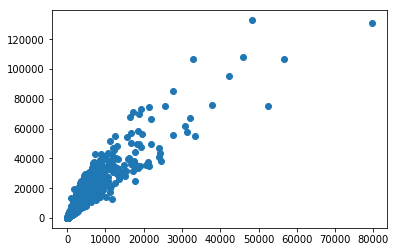

In [233]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


Text(0.5,0,'retweet count')

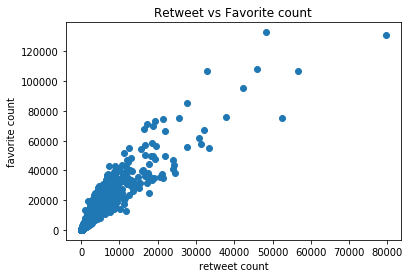

In [234]:
#Relation between retweet and favorite count
plt.scatter(x=df.retweet_count, y=df.favorite_count)
plt.title("Retweet vs Favorite count")
plt.ylabel('favorite count')
plt.xlabel('retweet count')

There is evidence that there are correlation between retweet and favorite count.

In [235]:
#Linear regression model
df['intercept']=1
lm = sm.OLS(df.retweet_count, df[['favorite_count', 'intercept']])

In [236]:
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     7945.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:14:49   Log-Likelihood:                -15247.
No. Observations:                1678   AIC:                         3.050e+04
Df Residuals:                    1676   BIC:                         3.051e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
favorite_count     0.3566      0.004     89.137      0.000       0.349       0.364
intercept       -455.0969     67.075     -6.785      0.000    -586.657    -323.537
==============================================================================
Omnibus:                     1635.327   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           217467.038
Skew:                           4.210   Prob(JB):                         0.00
Kurtosis:                      58.131   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear regression model suggest that there are strong correlation between the two variable (R = 0.9) and 82.6% favorite variability is explained by retweet variablity 